In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.manifold import TSNE

from time import time

In [2]:
df_train_ft = pd.read_csv('data/train_features.csv')
df_train_target = pd.read_csv('data/train_targets_scored.csv')

df_test_ft = pd.read_csv('data/test_features.csv')
df_test_target = pd.read_csv('data/sample_submission.csv')

In [3]:
print('df_train_ft shape: {}'.format(df_train_ft.shape))
print('df_train_target shape: {}'.format(df_train_ft.shape))
print('df_test_ft shape: {}'.format(df_test_ft.shape))
print('df_test_target shape: {}'.format(df_test_target.shape))

df_train_ft shape: (23814, 876)
df_train_target shape: (23814, 876)
df_test_ft shape: (3982, 876)
df_test_target shape: (3982, 207)


In [4]:
train_ft_ctl = df_train_ft.cp_type == 'ctl_vehicle'
test_ft_ctl = df_test_ft.cp_type == 'ctl_vehicle'

df_train_ft_ctl = df_train_ft[train_ft_ctl].copy()
df_test_ft_ctl = df_test_ft[test_ft_ctl].copy()

print('{} ctl_vehicle in train features'.format(df_train_ft_ctl.shape[0]))
print('{} ctl_vehicle in test features'.format(df_test_ft_ctl.shape[0]))
print('{} ctl_vehicle in train targets'.format(sum(df_train_target[train_ft_ctl].drop(columns=['sig_id']).sum())))

1866 ctl_vehicle in train features
358 ctl_vehicle in test features
0 ctl_vehicle in train targets


In [5]:
df_train_ft_trt = df_train_ft[~train_ft_ctl].copy()
df_train_target_trt = df_train_target[~train_ft_ctl].copy()
df_test_ft_trt = df_test_ft[~test_ft_ctl].copy()

print('{} trt_cp in train features'.format(df_train_ft_trt.shape[0]))
print('{} trt_cp in test features'.format(df_test_ft_trt.shape[0]))
print('{} trt_cp in train targets'.format(sum(df_train_target[~train_ft_ctl].drop(columns=['sig_id']).sum())))

21948 trt_cp in train features
3624 trt_cp in test features
16844 trt_cp in train targets


In [6]:
df_aug_target = df_train_target_trt.copy()
df_aug_target['numOfActivation'] = df_train_target_trt.drop(['sig_id'], axis=1).sum(axis=1)

num_of_activation = df_aug_target['numOfActivation'] != 0

df_num_of_activation = df_aug_target[num_of_activation].copy()
df_num_of_nonactivation = df_aug_target[~num_of_activation].copy()

print('df_num_of_activation shape: {}'.format(df_num_of_activation.shape))
print('df_num_of_nonactivation shape: {}'.format(df_num_of_nonactivation.shape))

df_num_of_activation shape: (14447, 208)
df_num_of_nonactivation shape: (7501, 208)


In [7]:
df_aug_target['numOfActivation'].unique()

array([1, 0, 3, 2, 4, 5, 7])

In [8]:
tsne = TSNE(n_components=2)
df = df_aug_target.drop(['sig_id'], axis=1)
df_aug_target_tsne_2 = tsne.fit_transform(df.iloc[:])

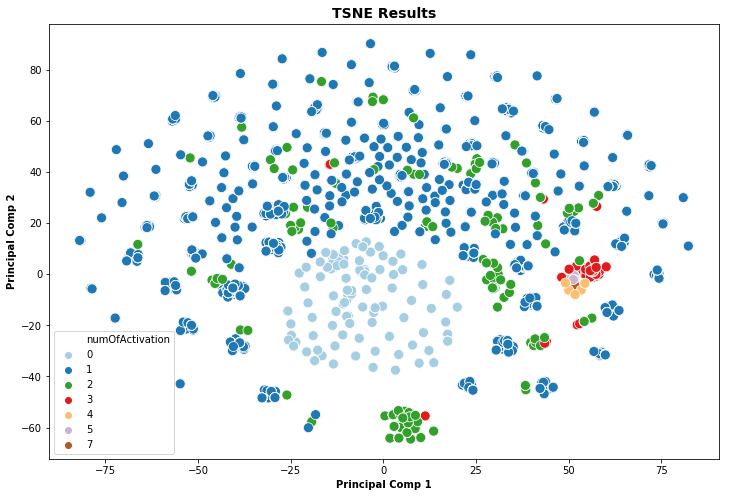

In [9]:
data = {'comp1': df_aug_target_tsne_2[:, 0], 'comp2': df_aug_target_tsne_2[:, 1], 
        'label': df['numOfActivation']}
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="comp1", y="comp2",
    data=data,
    legend='full',
    hue='label',
    palette='Paired',
    s=100
)
plt.title('TSNE Results', weight='bold').set_fontsize('14')
plt.xlabel('Principal Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Principal Comp 2', weight='bold').set_fontsize('10')
plt.show()

In [10]:
tsne = TSNE(n_components=3)
df = df_aug_target.drop(['sig_id'], axis=1)
df_aug_target_tsne_3 = tsne.fit_transform(df.iloc[:])

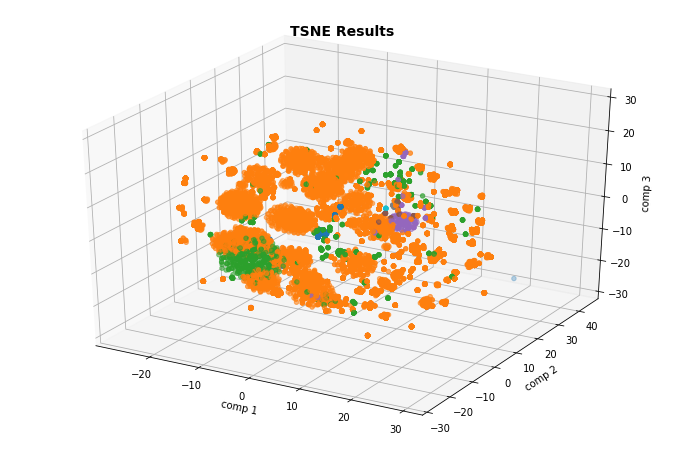

In [11]:
data = {'comp1': df_aug_target_tsne_3[:, 0], 'comp2': df_aug_target_tsne_3[:, 1], 
        'comp3': df_aug_target_tsne_3[:, -1], 'label': df['numOfActivation']}
plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
ax.scatter(
    xs=data['comp1'],
    ys=data['comp2'],
    zs=data['comp3'],
    c=data['label'],
    cmap='tab10'
)
ax.set_xlabel('comp 1')
ax.set_ylabel('comp 2')
ax.set_zlabel('comp 3')
plt.title('TSNE Results', weight='bold').set_fontsize('14')
#ax.legend()
plt.show()

In [12]:
df_binary = df_aug_target.copy()
df_binary['numOfActivation'] = df_aug_target['numOfActivation'].map({0:0, 1:1, 2:1, 3:1, 4:1, 5:1, 7:1})
df_binary['numOfActivation'].unique()

array([1, 0])

In [13]:
tsne = TSNE(n_components=2)
df = df_binary.drop(['sig_id'], axis=1)
df_binary_tsne_2 = tsne.fit_transform(df.iloc[:])

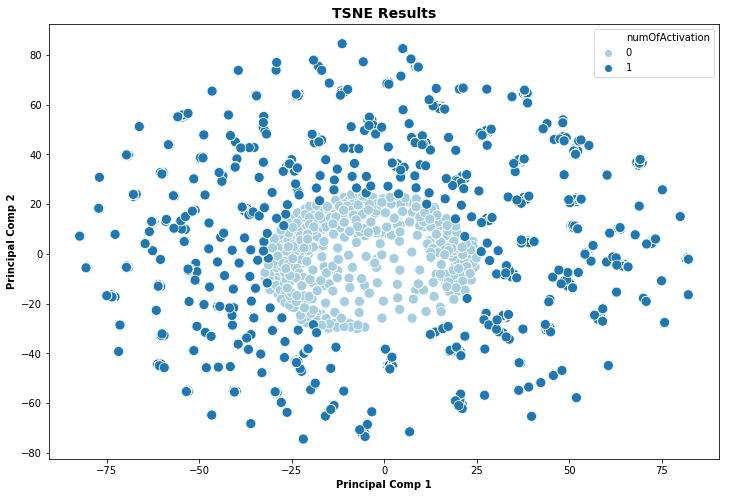

In [14]:
data = {'comp1': df_binary_tsne_2[:, 0], 'comp2': df_binary_tsne_2[:, 1], 'label': df['numOfActivation']}
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="comp1", y="comp2",
    data=data,
    legend='full',
    hue='label',
    palette='Paired',
    s=100
)
plt.title('TSNE Results', weight='bold').set_fontsize('14')
plt.xlabel('Principal Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Principal Comp 2', weight='bold').set_fontsize('10')
plt.show()

In [15]:
tsne = TSNE(n_components=3)
df = df_binary.drop(['sig_id'], axis=1)
df_binary_tsne_3 = tsne.fit_transform(df.iloc[:])

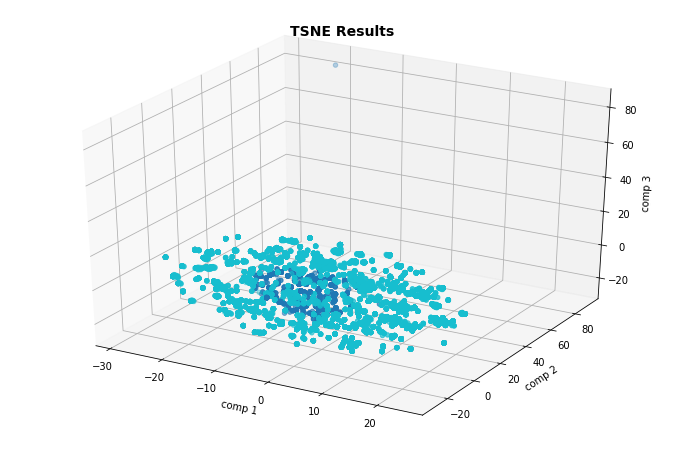

In [16]:
data = {'comp1': df_binary_tsne_3[:, 0], 'comp2': df_binary_tsne_3[:, 1], 
        'comp3': df_binary_tsne_3[:, -1], 'label': df['numOfActivation']}
plt.figure(figsize=(12, 8))
ax = plt.axes(projection='3d')
ax.scatter(
    xs=data['comp1'],
    ys=data['comp2'],
    zs=data['comp3'],
    c=data['label'],
    cmap='tab10'
)
ax.set_xlabel('comp 1')
ax.set_ylabel('comp 2')
ax.set_zlabel('comp 3')
plt.title('TSNE Results', weight='bold').set_fontsize('14')
#ax.legend()
plt.show()